# Additional Programming Concepts in Python

* [Learning objectives](#section_5+_0)    
* [Writing understandable code](#section_5+_1)
* [Avoid hard-coding](#section_5+_2)
* [Interactive plotting using Bokeh](#section5+_3)



# <span style="color:red">Learning objectives</span><a class="anchor" id="section_5+_0"></a>
In this notebook, you will learn about additional programming concepts in Python. They are not part of the learning objectives of the course, but you may run into them at some point, or wonder what they are, or find them fun and useful if you already have some programming experience. 

After completing this notebook, you are able to:
* write code that has a clear and understandable structure
* write code with descriptive variable names
* write code with explanatory comments
* write code that avoids "hard coding"
...

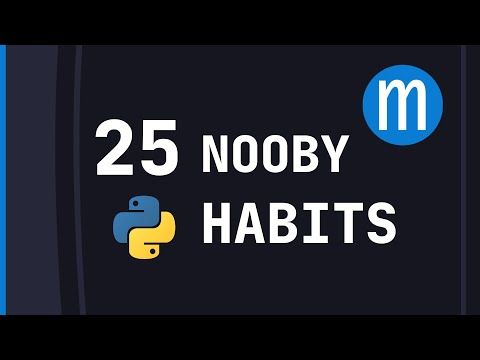

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('qUeud6DvOWI')

# <span style="color:red">Writing understandable code</span><a class="anchor" id="section_5+_1"></a>

Once you become an expert at coding, it will become very easy to write code that Python can understand. What is actually a big challenge in computer science is actually writing code that works, that is efficient, and most importantly, that **other people will understand!** 

You might think: but I'm writing this code only for myself, so I don't really care about if my code is easy to understand, right? There are many reasons why this is incorrect: 

1. In this course, your teachers and your TAs will need to understand your code in order to grade it. If we can't quickly understand what you have done, **this will affect your grade!!!** (One of our grading criteria will be the clarity and readability of your code.)

2. You might, in the future, want to share your code with someone else. If they have to spend a lot of time figuring out what you've done, then your code is useless to them. (In fact, this is the power of open languages like python, and is why python is so fantastically successful: there is a huge amount of code that other people have written that you can reuse!)

3. Weeks, months, or even years later, you might want to go back and re-use your own code. If your code not written in a clear and understandable way, you yourself will waste a lot of time trying to figure out what you did!

So how do you make sure that your code is understandable? There are two practices that can make this useful:

* **Meaningful variable names and logical structure**
* **Comments explaining what you're doing**

As a concrete example, I will take the following code below and show how by using these two techniques, an imcomprehensible piece of code that is them modified in two steps to be very easy to understand.

### BAD code

Here is the "bad" code:

In [ ]:
foo3 = 2.0; foo1 = 10; foo2 = 0.0
def foo6(foo1):
    return foo1**2
foo5 = 0.5*foo6(foo2) + foo6(foo3); foo4 = (foo3-foo2)/foo1
for foo7 in range(1,foo1):
    foo5 += foo6(foo2+foo7*foo4)
foo83 = (foo5*foo4)

Can you figure out what this code does? It would take a lot of time to truely understand what is happening...

This code is a mess, but is technically correct: it will give the right answer. But correct code can also be terrible code, and the code above is really terrible!

### Better variable names and logical structure

In [ ]:
def f(x):
    return x**4 - 2*x + 1

N = 10
a = 0.0
b = 2.0
h = (b-a)/N

s = 0.5*f(a) + 0.5*f(b)
for k in range(1,N):
    s += f(a+k*h)

answer2 = (h*s)

Why is this better? 

* Not all variables and functions are named `foo`, but have somewhat meaningful names like `f(x)`, `a`, `b`, `N`
* The definition of the variables is in a logical order (a is after b, for example)
* The functions are defined at the top (a common convention to make your code understandable)
* There are blank lines separating different logical parts of the code:
    * function definitions at the top
    * then the defining the values of the input variables
    * then the loop that does the actual work
    * then the definition of the answer / output

When you work on the Integration notebook, you may also  recognise this from the trapezoidal technique. The variable names also match the formulas from a textbook we have used in the past, and if you had just read the textbook section on Integration, you will also probably almost instantly recognize all the variable names from those used in the derivation from the book, and also what it does. 

However, if you come back at a later time when the integration section of the textbook is not so fresh in your head (as I did recently while updating this notebook), you may immediately think "what was I doing here?"

### Even better: Descriptive variable names

The above code is already better. And if I am looking a textbook where all the things above are clearly explained, then maybe the meaning of the parameters `a`, `b`, `N` etc are clear to me. However, if you haven't seen the code before, it may not be immediately obvious. Are `a` and `b` the slope and intercept of a line $y=ax+b$? Or are they something else? Is `N` the number of points in my discretisation, or is it the number of slices in my integral? 

For this reason, it is better to use descriptive variable names that themselves already describe what the meaning of the variable is:

In [ ]:
def f(x):
    return x**4 - 2*x + 1

N_slices = 10
start = 0.0
stop = 2.0
step_size = (stop-start)/N_slices

running_sum = 0.5*f(start) + 0.5*f(stop)

for i in range(1,N_slices):
    running_sum += f(start+i*step_size)

answer2 = (step_size*running_sum)

This is a bit more typing, but you can also use "tab completion" to save typing: just type the first few letters, push the "tab" key, and the Jupyter notebook will automatically type the rest out for you.

### Commenting your code

By taking some time to explain what you're doing and why, this code can now become instantly understandable:

In [ ]:
# Code for integration with the Trapezoidal rule

# The function we want to integrate
def f(x):
    return x**4 - 2*x + 1

# The number of slices we will use, and the starting and end points of the integral
# Note that this is NOT the number of points for our discritisation: that is N_slices+1.
N_slices = 10

# The starting and stopping points of our integration range
start = 0.0
stop = 2.0

# The step size
step_size = (stop-start)/N_slices

# A running sum we will use
# We start by the half of the start and end points (trapezoidal rule)
running_sum = 0.5*f(stop) + 0.5*f(stop)

# Now a for loop that does the sum.
# range(1,N_slices) will give us 9 numbers running from 1 to N_slices-1 
# For N_slices=10, we will get a list of 9 numbers: [1,2,3,4,5,6,7,8,9]
# Note that we do not need i = 0 because in the trapezoidal rule, we add it
# separately above with a factor of 0.5, together with the end point
for i in range(1,N_slices):
    running_sum += f(start+i*step_size)

# The integral is then given by the produce of the sum and the step siz
answer2 = (running_sum*step_size)

Here, we explain what we are doing and why! This code is likely understandable by anyone who reads it, including myself again in a year's time.

In particular, we can point out some of the sneaky things, such as the difference between number of slices and number of points, and also why our `range()` function starts at 1 and not 0. 

It is always a good idea to add comments explaning what you do. But, of course, you don't want to write code that is more comments than actual code! Where do I draw the line? When do I decide if I should add a comment of if I think it is already clear enough without it? 

**Good guideline:** if there is something that you had to fiddle around with for a while to get the code correct, add a comment in your code so that you remember this and others get to learn from your hard work!

Using descriptive variable names also helps, as then you may not have to add a comment where you otherwise would. 

And, while it takes some time while you're doing it, but adding detailed comments to our code will make your life MUCH easier in the future, will make your code understandable for others, and will maximize your grade :)

### Summary: Writing understandable code

In summary, you can make your code much more understandable for others if you:

1. Use descriptive variable names
2. Explain things in comments

# <span style="color:red">Avoid hard-coding</span><a class="anchor" id="section_5+_2"></a>


"Hard coding" is one of the coding practices we will be discouraging in this course, and the use of "hard coding" can lose you points in your final exam.

What is "hard coding"?

Hard coding is when you fill in values repeated at multiple places in your code. For example, say your are asked to make an array `x` that is 1000 points and runs from 0 to 10, calculate array $y = \sin(x)$, and then print out the percentage of points in `y` that have a value of less than 0.3. In the code snippets below, we will take a look at a **BAD** way of doing this with hard-coding, and then also proper ways of doing this that do not involve hard-coding.

### BAD code with hard-coding

Here is an example of a **BAD** piece of code that does this using hard-coding of the number of points:

In [ ]:
import numpy as np

# An example of hard coding (DO NOT DO!!!!)
x = np.linspace(0,10,1000)
y = np.sin(x)

num = 0
for i in range(1000):
    if (y[i]<0.3):
        num += 1

print("The percentange of points in y less than 0.3 is %.2f %%" % (num/1000*100))


The percentange of points in y less than 0.3 is 49.40 %


In this example code, we say that we have "hard coded" the number of points in the array. Say we wanted to then change the number of points in array `x` from 1000 to 1500: we would then have to go through all of our code by hand and change `1000` each time into `1500`. 

This time that is not so difficult since it is a short piece of code, but when you build more complex programs, this will become a lot more work, and the chance of getting a bug in your code will increase exponentially!

### GOOD example with no hard-coding: replacing hard coded numbers with a variable

Below, instead of typing in `1000` each time manually, we will define a variable at the top that will define how many points `x` has. This way, if we want to change the size of `x`, all we have to do is change this variable and everything will still work.

In [ ]:
# An example THE PROPER WAY, using a variable
npts = 1000
x = np.linspace(0,10,npts)
y = np.sin(x)
maxval=0.3

num = 0
for i in range(npts):
    if (y[i]<maxval):
        num += 1

print("The percentange of points in y less than 0.3 is %.2f %%" % (num/npts*100))

The percentange of points in y less than 0.3 is 49.40 %


The big advantage here is that you can just change `npts` and all the code works immediately with no further changes! We can make our code even more readable:

In [ ]:
# An example THE PROPER WAY, using a variable
npts = 1000
x = np.linspace(0,10,npts)
y = np.sin(x)
maxval=0.3

num = len(y[y<0.3])
print("The percentange of points in y less than 0.3 is %.2f %%" %(num/npts*100))


The percentange of points in y less than 0.3 is 49.40 %


As mentioned in the code, this is quite common and probably always a good idea for the for loop: this way, you never accidentally loop over the end of the array! 

(In python, this will either give an error, or, in the case of slicing, will give strange results since slicing applies "periodic" boundary conditions when indexing instead of giving an error...)

In the case of calculating the percentage, it is maybe a bit less obvious to a non-trained programmer that this is the right thing to do, in which case it is a good idea to add a comment to your code explaining what you're doing.

### Summary: How to avoid hard coding

You will make your code much more robust and maintainable by avoiding hard coding of values if you:

* Replace hard-coded values with variables
* Use functions that can automatically determine the appropriate value to use

### Looping over tuples without using indices

As mentioned briefly in Notebook 2, python `for` loops can also directly iterate over "iteratable" objects. 

The `tuple` (along with lists, which we will see in a bit, and numpy arrays, which we will see in the next notebook), is one such iteratable objecte. 

For example, to print all of entries of a `tuple` out in order, we can use directly following:


In [ ]:
for n in tup1:
    print(n)

During each subsequent iteartion of the loop, the variable `n` will be assigned to the next item that is stored in the tuple. 

## Lists

In this section, we will introduce a very commonly used data structure in python: the `list`. 

A list is a list of values, like a `tuple`, but that is made using square brackets:

```
my_list = [a, b, c, ...etc...]
```

In [ ]:
l1 = list(range(10))
l1

Like tuples, you can extract single elements of the list using indexing, and extract portions of the list using slicing:

In [ ]:
print(l1[0])
print(l1[0:5])

OK, so far so good. But if I have `tuple`, why would I ever want a list?

### Lists vs tupples: Tupples are "immutable", lists are "mutable"

This is a bit of python-speak for saying that you cannot change the values of a tupple, but you can change the values of a list.

What does this mean? It means if I have a list `[5,6,7]` and I want to change the last number in my list to an 8, I can just directly do this:

In [ ]:
l1 = [5,6,7]
l1[2] = 8

If I try this with a tuple, I will find that I can't do it!

In [ ]:
t1 = (5,6,7)
t1[2] = 8

Because of this functionality, **lists are much more powerful as we can change them once we've made them!**

In addition to changing lists by individual indexing, we can also change whole parts of the list using slicing:

In [ ]:
l2 = list(range(10))
print(l2)

In [ ]:
# Replace three entries by zeros
l2 = list(range(10))
l2[4:7] = [0,0,0]
print(l2)

In [ ]:
# Remove entries from a list by replacing them with an empty list []
l2 = list(range(10))
l2[4:7] = [] 
print(l2)

### Functions for manipulating lists

In fact, our list object itself has functions built in that allow you to change it! Some examples of things we can do:

In [ ]:
# This will add an element to the end of the list
l1.append(10)
l1

In [ ]:
# This will remove an element from the end of the list
l1.pop()
l1

There are many more functions built into lists, some of which you can find here:

https://docs.python.org/3/tutorial/datastructures.html

### The problem with lists for scientific computing

Lists look an awful lot like numpy arrays: why don't we just use lists? 

In scientific computing, it is very common to want to perform numerical operations on <a href=https://en.wikipedia.org/wiki/Row_and_column_vectors>vectors and matrices</a> of numbers. And also, many times in experiments, the data you will take will be represented by a vector of numbers: for example, the position of a particle as a function of time.

A vector is a collection of numbers in a one-dimentional array:

$$
x = [1, 2, 3, 4, 5]
$$

In Notebook 3, we already introduced python `list`s. A list is also a vector, right? It certainly looks the same! Why do we need something new? 

The reason we need something new is that python `list`s are not designed to work in the same way as we expect vectors to from our mathematics classes. For example, in math:

$$
2x = [2,4,6,8,10]
$$

Let's check if this works with lists

In [ ]:
l = [1, 2, 3, 4, 5]
print(2*l)

This certainly does something, but it does not do what we want! It has made the list twice as long by appending two of them together!

Also addition and subtraction doesn't work like we would expect:

In [ ]:
print(l+l)

Addition makes the list twice as long? And:

In [ ]:
print(l-l)

And subtraction doesn't work at all...clearly, although they look a lot like vectors, in terms of mathematics, lists do not act much like vectors. This is one of the reasons numpy arrays were created.

## Dictionaries

Another useful data type in python is a "dictionary":

https://docs.python.org/3/tutorial/datastructures.html#dictionaries

At a basic level, a dictionary is a bit like a list that supports non-numeric indices. Dictionaries can be created using the curly brackets in python `{` and `}`. 

Here we will create an empty dictionary and start filling it:

In [ ]:
delft_lunch_rating = {}
delft_lunch_rating['greek olive'] = 10
delft_lunch_rating['brandmeester'] = 7
delft_lunch_rating['aula'] = "expensive"
delft_lunch_rating['citg'] = "bad"
delft_lunch_rating['doner'] = "good but a bit salty"

This is what our dictionary looks like:

In [ ]:
print(delft_lunch_rating)

{'greek olive': 10, 'brandmeester': 7, 'aula': 'expensive', 'citg': 'bad', 'doner': 'good but a bit salty'}


I can then look up values in my dictionary using the "keys":

In [ ]:
delft_lunch_rating['aula']

'expensive'

There are also functions for getting all the keys:

In [ ]:
delft_lunch_rating.keys()

dict_keys(['greek olive', 'brandmeester', 'aula', 'citg', 'doner'])

My dictionaries can also hold lists if I want:

In [ ]:
delft_lunch_rating["greek olive"] = ['good', 10]

Dictionaries are actually a way to implement a basic database in python (I use them in my grading scripts to look up the email addresses and student numbers of a given netid...)

And the Jupyter notebook files actually store a list cells, and each cell consist of a dictionary that contains the text of the cell (and other fun things like metadata). You can see this in action using the <a href=https://nbformat.readthedocs.io/en/latest/api.html>nbformat</a> library, you can actually load a notebook file into your python kernel and poke around it to see what it looks like. 

## Strings

In notebook 1, we already saw strings as variable types. 

It turns out that strings are not just simple (immutable) variables like `int`s and `float`s: `str`s are actually data structures that are indexable (like `tuple`s and `list`s). 

Strings are immutable, which means they cannot be changed. But they do have lots of built-in functions that can return a new string (or lots of other things!). 

Let's look at an example:

In [ ]:
s1 = "This is a string"

Indexing a string returns the characters of the string:

In [ ]:
print(s1[0])

We can also slice:

In [ ]:
print(s1[0:6])

Strings do not allow you to directly change 

### Built-in string functions

Strings have a bunch of useful built-in functions: 

https://docs.python.org/3/library/stdtypes.html#string-methods

some of which we will look at here:

### Splitting a string

Strings have a built-in function `split()`. By default, it will return a list of "words" by using whitespaces as the separator:

In [ ]:
s1.split()

Passing `.` as an argument, `split()` will use that as a separator, which is useful for working with filenames:

In [ ]:
input_file = 'myfile.dat'
output_file = input_file.split('.')[0]
output_file += "_processed.dat"
print(output_file)

### Replacing parts of strings

The function `replace()` replace substrings in your string for you:

In [ ]:
s2 = "This is a long sentence. It is a good idea to end it."
print(s2)
print(s2.replace(" is", " was"))

Note that without the space, it will also replace the "is" in "This":

In [ ]:
print(s2)
print(s2.replace("is", "was"))

### Testing for the contents of a string

You can check if a substring is found inside a string using the `in` logical operator:

In [ ]:
if "this" in "somewhere in this sentence":
    print("We found a 'this'")

In [ ]:
# It is case sensitive:
if "this" in "This is a sentence":
    print("This will not get printed")

In [ ]:
# But you can use the .lower() function of a string to do case insensitive checks
s3 = "This is a sentence"
if "this" in s3.lower():
    print("Using .lower(), s3 is converted to all lower-case:\n")
    print("s3.lower = '%s'\n" % s3.lower())
    print("And now we do find the substring 'this'")

Here, we can also see an example of special characters in strings: a `\n` in a string specifies a "new line":

https://docs.python.org/3/reference/lexical_analysis.html#strings

Note that if you want to print a backslash `\`, you need to put a double backslash in your string: `\\`.

### String formatting

Until now, we have been printing values of our variables using the standard `str()` conversion of numbers to strings:

In [ ]:
a = 11/300
print("The value of a is", a)

# The above print() statement is equivalent to:

output = "The value of a is"
output += " "
output += str(a)
print(output)

But maybe we don't want so many digits in our text output. Say I want only two digits. How can I do this? 

For this, python supports "string formatting". My personal preference is to work with traditional "printf-style" formatting, inherited from the C programming language:

https://docs.python.org/3/library/stdtypes.html#printf-style-bytes-formatting

It sounds a bit scary at first, but it's actually pretty easy to use. It works by using a special operator `%` that works with strings. 

To use it, you include a special text in your string that starts with `%`, followed by a sequence of numbers and letters that you use to tell python how you want the string to be formatted. 

Here are some examples:

In [ ]:
# Floating point format with 4 digits
print("The value of a is %.4f" % a)

In [ ]:
# Exponential notation with two digits
print("The value of a is %.2e" % a)

In [ ]:
# A string with the formatting not at the end
print("The value of a is %.2e seconds" % a)

# Some additional matrix creation routines

There are several functions for making matrices which you may find useful someday: 

https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html

including this one which I use often:

In [ ]:
# The identity matrix
print(np.eye(10))

In [ ]:
# A band diagonal matrix
print(np.eye(10,k=-1))

## Mutable objects and "call by reference"

### The `=` operator

Now that we have introduced some more advanced data types, it is time to go back and revisit one of our first topics: the `=` opeartor.

At the start of the first notebook, we introduced the **assignment operator** `=`, and saw that it could be used to give new values to a variable based on the value of another variable:

In [ ]:
a = 5
b = a
print(b)

What happens if we change the value of `a` after the statment `b = a`? For example:

In [ ]:
a = 5
b = a
a = 6

What value does `b` have? Does it have the value of `5` that `a` had when we performed the assignment operation, or does it have `6` (the new values of `a`)?  

The obvious answer would be that `b` should have the answer `5`, right? Let's check it:

In [ ]:
a = 5
b = a
a = 6
print(b)

OK, that seems to make sense. 

Now let's take a look at and examples with lists. We will create a list `a`, using the assignment operator to make a list variable `b = a`, and then change the values in the list `a`.

In [ ]:
a = [2,1]
b = a
a[0] = 1

Now question: did `a[0] = 1` change the value of of `b`? Let's check:

In [ ]:
print(b)

Changing the values of `a` also changed list `b` for some reason? **WHY!!!!?????!!! WHAT IS GOING ON?!!?**

### "Call by value" and "Call by reference"

To understand what is going on here, we have to understand how computer programs store variables and their values. 

When I create a variable `a` in a python by giving it a value `5`, for example, python creates a space in your computers memory where it puts the value `5` and then makes a name for that variable `a` in the kernel's list of variables that points to that spot in memory. 

For some types of objects in python, specifically "immutable" ("unchangeable") object types, when you execute the statement `b = a`, python will create a new spot in your computers memory for variable `b`, copy the value `5` into that memory spot, and then makes variable `b` point to this new spot in the kernel's list of variables. 

This procedure is called "call by value" in programming languages, and is illustrated here: 

<img src="resource/asnlib/public/call_by_value.png"></img>

For "mutable" objects, python uses a different concept: "call by reference". In call by reference, `b = a` instead does the following: it make a new variable `b` in the list of variables, and make it point to the spot in memory where variable `a` is stored, illustrated here:

<img src="resource/asnlib/public/call_by_reference.png"></img>

It is now obvious why changing the values in `a` will also changes the values in `b`: it is because they point to the same data in your computers memory.

"Call by reference" also holds for when you are passing variables to functions:

In [ ]:
def set_first_entry_to_zero(x):
    x[0] = 0

a = [1,2]
set_first_entry_to_zero(a)
print(a)

We can see that our function changed the value of the variable mylist! This was not possible with integers for example:

In [ ]:
def set_to_zero(x):
    x = 0

a = 1
set_to_zero(a)
print(a)

### Why use "call by reference" at all? I find it confusing!

You might ask: why python does this? Well, one reason is that it is that lists, and in particular numpy arrays that we will look at next, can sometime become very big, taking up 100 MB of memory or more. If python used "call by value" for such big things all the time, it would use up massive amounts of memory! Every function call or assignment statement would accdientally use up another 100 MB of memory! By using "call by reference", it can avoid accidentally filling up your computers memory every time you use the `=` operator. 

If you really want to have a *copy* of a list (or a numpy array), these objects typically have `copy()` functions built in that return instead a copy of the object, for when you really need one. 

In [ ]:
a = [2,1]
b = a.copy()
print(b)
a[0] = 1
print(b)

Now, `b` is unaffected by your changes to `a` because the name `b` points to a new copy of the array in memory.

## Interactive plots with ipywidgets

One of the cool things that is easy to do in Jupter notebooks is to make "interactive" plots. 

For example, in projectile motion, I may want to be able to play with the angle and see how this changes my trajectory. For this, there is a very easy to use and convenient library called `ipywidgets`.

The way it works is we make a function that generates our plot that takes the parameter we want to play with as an argument. We then call an `ipywidgets` function called `interact()`, and it will automatically make a "live update" plot in your web browser in which you can adjust the parameter an see how the plot changes. 

Let's look at an example:

In [ ]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt

v0 = 10 # m/s
g = 9.8 # m/s^2
x = np.linspace(0,10,100)

# We will allow theta to be adjusted and start it at 45 degrees
def update_plot(theta=45):
    theta *= np.pi/180 # convert to radians
    y = -g/(2*v0**2*np.cos(theta)**2)*x**2 + x*np.tan(theta)
    plt.plot(x,y)
    plt.ylim(-1,6) # Manually set the ylimits
    plt.xlabel("Distance (m)")
    plt.ylabel("Height (m)")
    plt.axhline(0, ls=":", c="grey")
    plt.show()
   
# Now we call interact, and give it a tuple specifiying the min, max and step for the theta slider
interact(update_plot, theta=(0,89,2))
from ipywidgets import interact

v0 = 10 # m/s
g = 9.8 # m/s^2

# We will allow theta to be adjusted and start it at 45 degrees
def update_plot(theta=45):
    theta *= np.pi/180 # convert to radians
    y = -g/(2*v0**2*np.cos(theta)**2)*x**2 + x*np.tan(theta)
    plt.plot(x,y)
    plt.ylim(-1,6) # Manually set the ylimits
    plt.xlabel("Distance (m)")
    plt.ylabel("Height (m)")
    plt.axhline(0, ls=":", c="grey")
    plt.show()
    
# Now we call interact, and give it a tuple specifiying the min, max and step for the theta slider
interact(update_plot, theta=(0,89,2))

interactive(children=(IntSlider(value=45, description='theta', max=89, step=2), Output()), _dom_classes=('widg…

interactive(children=(IntSlider(value=45, description='theta', max=89, step=2), Output()), _dom_classes=('widg…

<function __main__.update_plot(theta=45)>

It is a bit slow in updating if you wiggle it too much with the mouse, but if you click on the slider and adjust it using the arrow keys on your keyboard, it works pretty well. 

If you are fitting a line to your data, this can also be very useful for getting a good initial guess:

In [ ]:
def update_plot2(slope=0.5):
    line = t*slope
    plt.plot(t,v, '.')
    plt.plot(t,line, lw=4)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.show()

interact(update_plot2, slope=(0,10,0.1))

interactive(children=(FloatSlider(value=0.5, description='slope', max=10.0), Output()), _dom_classes=('widget-…

<function __main__.update_plot2(slope=0.5)>

It is also easy to make two sliders:

In [ ]:
def update_plot3(slope=0.5, offset=0):
    line = t*slope+offset
    plt.plot(t,v, '.')
    plt.plot(t,line, lw=4)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.show()

interact(update_plot3, slope=(0,10,0.1), offset=(-4,3,0.2))

## Functions

### Keyword and optional arguments

In addition to the "positional" arguments we introduced earlier, python also supports another type of argument: the "keyword" argument. These are often used for "optional" arguments that you don't neccessarily need but may want to give the user the option of using. The syntax is:

```
def function_name(var1, optional_var2 = default_value)
    ...
```

The "default_value" is the value that the optional argument will have if it is not specified by the user. 

In python-speak, these "optional" arguement as called "keyword" arguments, and the normal arguments we introduced above are called "positional" arguments. In python, in both defining and using functions, keyword arguments must always come after all of the positional arguments. 

Here, we will show an example where we use an optional parameter to change the way we print the status sentence. 

In [ ]:
def print_status4(x, long=True):
    if long:
        print("The value of the first input variable is ", x)
    else:
        print("Val is ", x)

print_status4(1)
print_status4(2.5, long=True)
print_status4(2.4, long=False)

Because python assigns the value of keyword argument variables in the function by matching the keyword and not their position in the list, if you have multiple keyword arguments, you can also change the order of them when you use the function. 

For example, if I define a function:

```
def myfunction(x, var1=1, var2=4):
    ...
```

then both of these would do the same thing:

```
myfunction(1,var1=3, var2=54)
myfunction(1,var2=54, var2=3)
```

Finally, one can also use keywords as a way to send values to functions even if the functions are not defined with keyword arguments. This allows you to change to order of variables you send to a function if you  want. For example:

In [ ]:
def myfun(x,y):
    print("x is", x)
    print("y is", y)    

In [ ]:
myfun(1,2)

In [ ]:
myfun(2,1)

In [ ]:
myfun(x=1,y=2)

In [ ]:
myfun(y=2,x=1)

### Python Error Messages with functions

In the first notebook, we learned some of the basics of how to understand python errors.

Sometimes, though, if you are using functions from a library, the error messages can get very long, and trickier to understand. 

Here, we will look at how to dissect an example of a more complicated error you can get from a function in a library and how to figure out where the useful information is.

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2], [1,2,3])

Wow, that was a really big error message. What do I do with all of this? 

The most important information is at the very top and at the very bottom (you can just skip the rest for now...). 

At the top, it shows us the part of our code that triggered the error:

<img src="resource/asnlib/public/big_error_1.png"></img>

The error type is a `ValueError`, which according to the documentation, indicates "an argument that has the right type but an inappropriate value". 

In the middle there is then a whole bunch of stuff we won't easily understand. What is all of this? This is showing us what is happening inside all the functions of the matplotlib library...probably unless you are a bit of an expert, you will not really understand all of this. 

We can learn more, though, by looking at the last line:

<img src="big_error_2.png"></img>

What are `x` and `y`? They are the variable names in the library function in matplotlib where we ended up, so probably also maybe not immediately obvious what they are. But we can see more about the problem: it is complaining that two of the variables do not have the same shape. 

If we look up at the line in our code that triggered the error, we can see that we have supplied two arguments that have a different number of elements: `plt.plot([1,2], [1,2,3])`

It would seem that both the first and second variables of the `plot` function should have the same number of elements. Indeed, if we try:

`plt.plot([1,2,3], [1,2,3,])`

then the error goes away:

In [ ]:
plt.plot([1,2,3], [1,2,3,])

## Learning objectives list

Not crucial since this notebook is optional, but maybe useful to have.

**Learning objectives for this notebook:**

* Student is able to create and index tuples and lists by hand and using the `range()` operator
* Student is able to loop over tuples and lists without indexing
* Student is able to extract subsets of lists and tuples using slicing
* Student is able to change individual entries of a list using indexing and the assignment operator
* Student is able to use built-in functions of lists 
* Student is able to use indexing to extract substrings from a string
* Student is able to use built-in string functions
* Student is able to split a string into a list of strings using the `.split()` function
* Student is able to search in strings using the `in` operator
* Student is able to use formating and the `%` opereator to control how variables are translated into strings
* Student is able to predict how variables behave differently for "mutable" and "non-mutable" objects (call-by-value vs. call-by-reference)
* Student is able to use the `ipywidgets` `interact()` function to explore functions using sliders



## Zip function
The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

In [9]:
a = ("jan", "berend", "erik")
b = ("johanna", "catherina", "miriam")
x = zip(a,b)
print(tuple(x))


(('jan', 'johanna'), ('berend', 'catherina'), ('erik', 'miriam'))


In [17]:
## dictonary
car1 = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

car2 = {
  "brand": "Volvo",
  "model": "V60",
  "year": 2020
}

In [19]:
print(car2["brand"])

Volvo


In [1]:
#Contour plotting with sliders

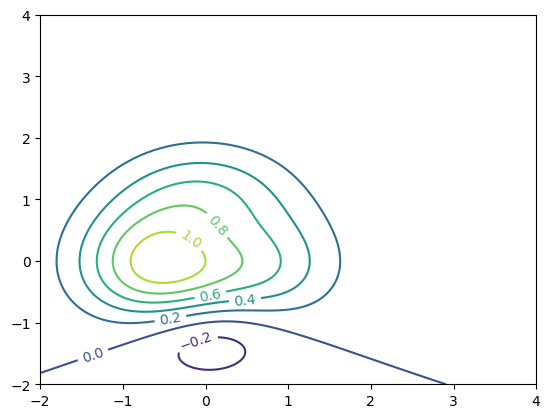

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    f = (1.0 - 0.5*x + x**2 + y**3)*np.exp(-x**2-y**2)
    return f

n = 500
x = np.linspace(-2, 4, n)
y = np.linspace(-2, 4, n)

X, Y = np.meshgrid(x, y)

plt.figure()
C = plt.contour(X, Y, f(X, Y), 8)
plt.clabel(C, inline=1)
plt.show()


## <span style="color:red">5.4 Making interactive plots using Bokeh</span><a class="anchor" id="section5+_3"></a>

The above examples with matplotlib are great for plotting your data for a report. 

Sometimes, though, you may want to be able to zoom in on a tiny little features in your function or data. For this, you want to go beyond just making static plots in your notebook, and make plots that you can interact with using your mouse. 

The best way to do this right now is using a plotting library called [Bokeh](https://docs.bokeh.org/en/latest/index.html). While Bokeh can in principle also generate PDF plots for reports as well, we find that matplotlib is a better and easier library for that purpose. Bokeh however is (currently) *far* better for making interactive plots of your data, and so here we will show you a few simple lines of code enable you to make plots of data that you can explore interactively. 

*(While this notebook will focus on interactively exploring data, you can also easily make plots to interactively change the data that is plotted: for more information on how to do this, you can check out this [youtube video](https://www.youtube.com/watch?v=i54rgRme62w).)*

First, we will load a very high resolution dataset, with lots of points: it will be a good example of why you want to be able to zoom in and see features interactively. 

In [2]:
# unpack=True is also a handy way to load data 
# (saves some extra code)
# Note this is a big data file, it will take a while to load.

x,y = np.loadtxt("example2.dat", unpack=True)

NameError: name 'np' is not defined

Note that this is a pretty extreme example: the dataset has 100 thousand points! 

First, let's plot the data in a static plot using matplotlib: 

In [3]:
plt.figure()
plt.plot(x,y,'k.',markersize=1)
plt.xlabel("x (no units)")
plt.ylabel("y (no units)")
plt.show()

NameError: name 'plt' is not defined

Clearly, this function has some tiny little blip around x=2 and another around x=5. As a curious physicist, I'd like to zoom in and see in more detail what these look like. 

I could do this using the `plt.xlim()` and `plt.ylim()` functions and rerun my code cell, but what I'd really like to be able to do is to click and zoom in on them. 

The code below will show you how to generate such an *interactive plot* using Bokeh. First we need to load some libraries and tell Bokeh that we want our plots to be output to the notebook:

In [4]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

Next, we can use the following code to make our interactive plot:

In [5]:
p = figure(height=300, width=600) 
p.sizing_mode = "scale_width"
p.line(x,y)
p.xaxis.axis_label = 'x (no units)'
p.yaxis.axis_label = 'y (no units)'
show(p)

NameError: name 'x' is not defined

Now, instead of getting just an image in your web browser, you will get an interactive plot! 

On the right hand side of the plot, there are some controls:

**Drag window zoom mode**:

<img src="bokeh_drag_window_zoom.png"> 

This button (enabled by default) allows you to click and drag to zoom in on the plot. 
    
**Scroll wheel zoom mode**:

<img src="bokeh_scroll_wheel_zoom.png"> 

This button will allow you zoom in and out around the position of your mouse using the scroll wheel. If you hover your mouse over the x or y axis, the scroll wheel will only zoom that axis. 

**Pan mode:**

<img src="bokeh_pan.png"> 

If you click on this button, the mouse will switch to "pan" mode. Clicking and dragging on the plot will now shift the plot around following your mouse movement. In this mode, you can also click on the axes to pan in only one direction. 

**Reset zoom:**

<img src="bokeh_reset_zoom.png"> 

This will undo all zooming and return you to the original plot ranges. 

**Save PNG snapshot:**

<img src="bokeh_save_png.png"> 

This will download the current view of your data as a PNG screen snapshot. This can be handy if you want to quickly share an image with someone, but be warned: the images generated by this button **are not** suitable for use in reports. For that you should use matplotlib to make a proper PDF, using xlim and ylim if needed based on what you found exploring your data in Bokeh.